In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pycaret
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("cars_new.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [4]:
df.rename(columns = {'Unnamed: 0':'ID'}, inplace= True)
df.head(2)

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [5]:
df['Engine'] = df['Engine'].str.replace('CC','')
df['Mileage'] = df['Mileage'].str.replace('km/kg','')
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Power'] = df['Power'].str.replace('bhp','')
df.head()

,ID,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [6]:
(df.isnull().sum()/len(df))*100

ID                    0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [7]:
df['Seats'].mode()

0    5.0
dtype: float64

In [8]:
df['Seats'].fillna(value = 5.0, inplace = True)
df['Seats'].isnull().sum()

0

In [9]:
df['Mileage'].mode()

0    17.0 
dtype: object

In [10]:
df['Mileage'].fillna(value = 17.0, inplace = True)

In [11]:
df.Engine = df.Engine.astype(float)

In [12]:
df.isnull().sum()

ID                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [13]:
#from pycaret.regression import *

In [14]:
#cl = setup(data = df, target = 'Price')

In [15]:
#lr = create_model('lr')

In [16]:
df.Engine.describe()

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

In [17]:
q=df.Engine.quantile(0.99) # 99 percentile of Engine value
df.Engine=df.Engine[df.Engine<q]

In [18]:
df.Engine.mode()

0    1197.0
dtype: float64

In [19]:
df.Engine.fillna(value =1197 , inplace = True)
df.Engine.isnull().sum()

0

In [20]:
df['Power'] = df['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df.Power[df.Power == 'null'] = np.NaN
df['Power'].isnull().sum()

143

In [21]:
df['Power'] = df['Power'].astype(float)

In [22]:
q=df.Power.quantile(0.99)
df.Power=df.Power[df.Power<q]

In [23]:
df.Power.mode()

0    74.0
dtype: float64

In [24]:
df['Power'].fillna(value = 74, inplace = True)
df.Power.isnull().sum()

0

In [25]:
df['Name'] = df['Name'].str.split(' ').str[0]
df.groupby('Name')['ID'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: ID, dtype: int64

In [26]:
df.Name[df.Name == 'ISUZU'] = 'Isuzu'

In [27]:
df['Price_log']=np.log(df.Price)
del df['Price']

In [28]:
df.Year=df.Year.astype(float)
df.Kilometers_Driven=df.Kilometers_Driven.astype(float)
df.dtypes

ID                     int64
Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price_log            float64
dtype: object

In [29]:
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies.head()

,ID,Year,Kilometers_Driven,Engine,Power,Seats,Price_log,Name_Audi,Name_BMW,Name_Bentley,...,New_Price_9.97 Lakh,New_Price_9.99 Lakh,New_Price_91.23 Lakh,New_Price_91.38 Lakh,New_Price_92.5 Lakh,New_Price_92.79 Lakh,New_Price_95.04 Lakh,New_Price_95.13 Lakh,New_Price_95.38 Lakh,New_Price_99.92 Lakh
0,0,2010.0,72000.0,998.0,58.16,5.0,0.559616,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015.0,41000.0,1582.0,126.20,5.0,2.525729,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011.0,46000.0,1199.0,88.70,5.0,1.504077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012.0,87000.0,1248.0,88.76,7.0,1.791759,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013.0,40670.0,1968.0,140.80,5.0,2.875822,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = df_dummies['Price_log']
x =df_dummies.drop("Price_log", axis=1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=365)

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_hat=reg.predict(x_train)

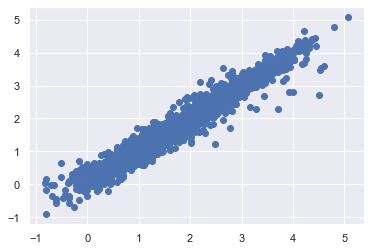

In [34]:
plt.scatter(y_train,y_hat)

Text(0.5, 1.0, 'Residuals')

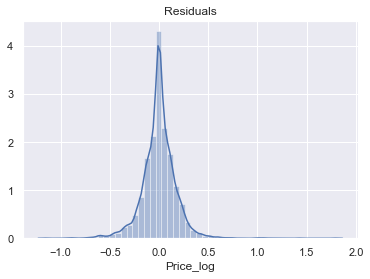

In [35]:
sns.distplot(y_train-y_hat)
plt.title('Residuals')

In [36]:
reg.score(x_train,y_train)

0.9598855761977483